<FONT size = 7><B>Homework_5 單變量函數的根與最小值<B/></FONT>

<font face="標楷體" size = 5> 學號 : 411078042  <br>
姓名 : 李翊愷 </font>

<font color=#D36010>目標</font> ： 可以參考此<A HREF=https://wp.me/P475HY-lp>網站</A>  <br>

1. 題目在講義 Lesson 7 最後的習題，作答第 1 ~ 4 題。 <br>

2. 請按照前面寫作的標準，從標題、姓名、學號、目標、每題題目敘述、注意事項與討論，一一陳述。當然包括程式碼與執行結果。<br>


<FONT size = 6>function 0.0</FONT> <br>

定義一個畫圖函數 : <br>

In [1]:
import matplotlib.pyplot as plt
# def draw function
def draw(x, y, x_point=None, y_point=None, title="", y_range=None, target_area=None, label=None):
    # plot
    plt.style.use("seaborn")
    plt.figure(figsize=(15, 10))
    plt.grid(True)
    plt.plot(x, y, color="deepskyblue", linewidth=3, label=label)

    # text
    if x_point != None and y_point != None:
        plt.scatter(x_point, y_point, color='black',
                    marker='o', s=100, label=r'$\lim_{{x \to 0}}$')
        for i, (x, y) in enumerate(zip(x_point, y_point)):
            plt.annotate(f'({x:.2f}, {y:.2f})', (x, y), textcoords="offset points", xytext=(
                0, 30), ha='center', fontsize=18, color='red')

    # fill_between
    if target_area is not None:
        a = np.array([0])  # start point as np array
        x_target = np.array([target_x(target_area)])  # change to np array
        plt.fill_between(x, y, where=((x >= a) & (
            x <= x_target[0])), color='mediumpurple', alpha=0.3, label=f'Area: {target_area}')

    # custom show
    plt.tick_params(labelsize=20)
    plt.xlabel('X', fontsize=20)
    plt.ylabel('Y', fontsize=20)
    plt.ylim(y_range)
    plt.title(title, fontsize=30)

<FONT size = 6>function 0.1</FONT> <br>

定義一個尋找最小值的函數 : <br>

In [2]:
# find min
from scipy import optimize
def find_min_val(x_range, f):
    x_min = optimize.fminbound(lambda x: f(x), x_range[0], x_range[1])
    min_val = round(x_min, 4)
    return min_val, f(min_val)

<FONT size = 6>function 0.2</FONT> <br>

定義一個尋找根的函數 : <br>

In [3]:
import numpy as np
from scipy.optimize import root_scalar
def find_roots(f, x_range, step_size=0.001):
    roots = []
    y_root_vals = []

    for initial_guess in np.arange(x_range[0], x_range[1], step_size):
        initial_guess = round(initial_guess, 4)
        # Ensure f(a) and f(b) have different signs
        a, b = initial_guess, initial_guess + step_size
        if f(a) * f(b) > 0:
            continue
        root_result = root_scalar(f, bracket=[a, b])
        
        if root_result.converged:
            root_val = round(root_result.root, 4)
            y_root_val = round(f(root_val), 2)
            
            if y_root_val == 0:
                roots.append(root_val)
                y_root_vals.append(y_root_val)
            
    return roots, y_root_vals


#  $\min\limits_{x} \sqrt{\cfrac{x^2 + 1}{x+1}}$

In [4]:
# def f1
def f1(x):
    with warnings.catch_warnings():
        # ingoring warning
        warnings.filterwarnings("ignore", category=RuntimeWarning)
        result = ((x**2 + 1)/(x+1))**0.5
    return result

In [ ]:
def f2(x):
    with warnings.catch_warnings():
        # ingoring warning
        warnings.filterwarnings("ignore", category=RuntimeWarning)
        result = 
    return result

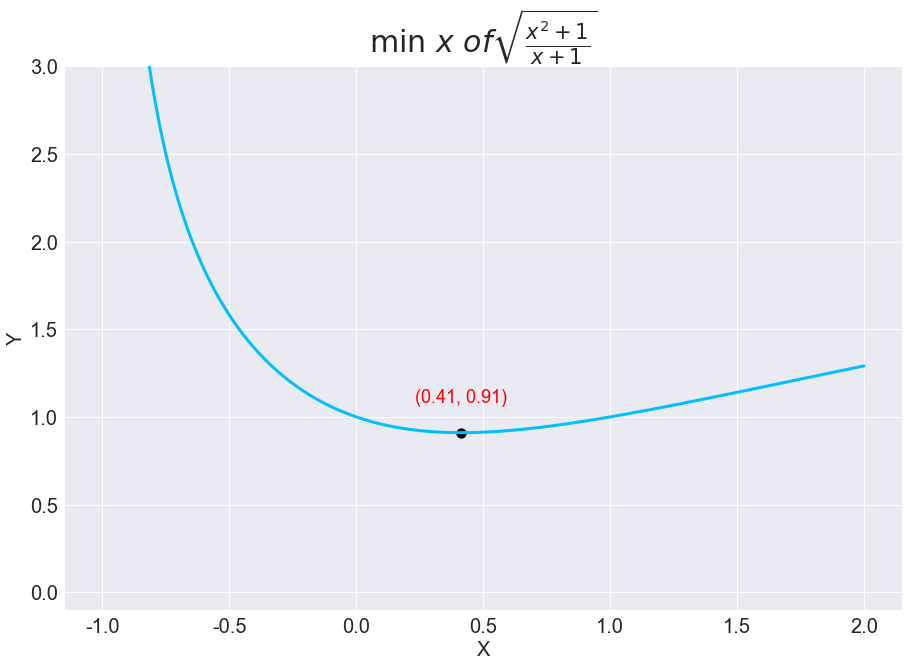

In [25]:
# main
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import warnings

# def x range
x_range = (-1, 2)

# fin min value
x_min_val, y_min_val = find_min_val(x_range, f1)

# plot
x = np.linspace(x_range[0], x_range[1], 1000)

# adjust plot
# title
title = r"$\min \ x \ of \sqrt{\frac{x^2 + 1}{x+1}}$"

# plot
draw(x, f1(x), [x_min_val], [y_min_val], title, y_range=(-0.1, 3))

plt.show()

## 找出最小值 討論
沒啥特別的

# $\min\limits_{-4 \le x \le 3} (x+1)^5 sin(x-3)$

In [12]:
# def f2
def f2(x):
    with warnings.catch_warnings():
        # ingoring warning
        warnings.filterwarnings("ignore", category=RuntimeWarning)
        result = ((x + 1) ** 5) * np.sin(x-3)
    return result

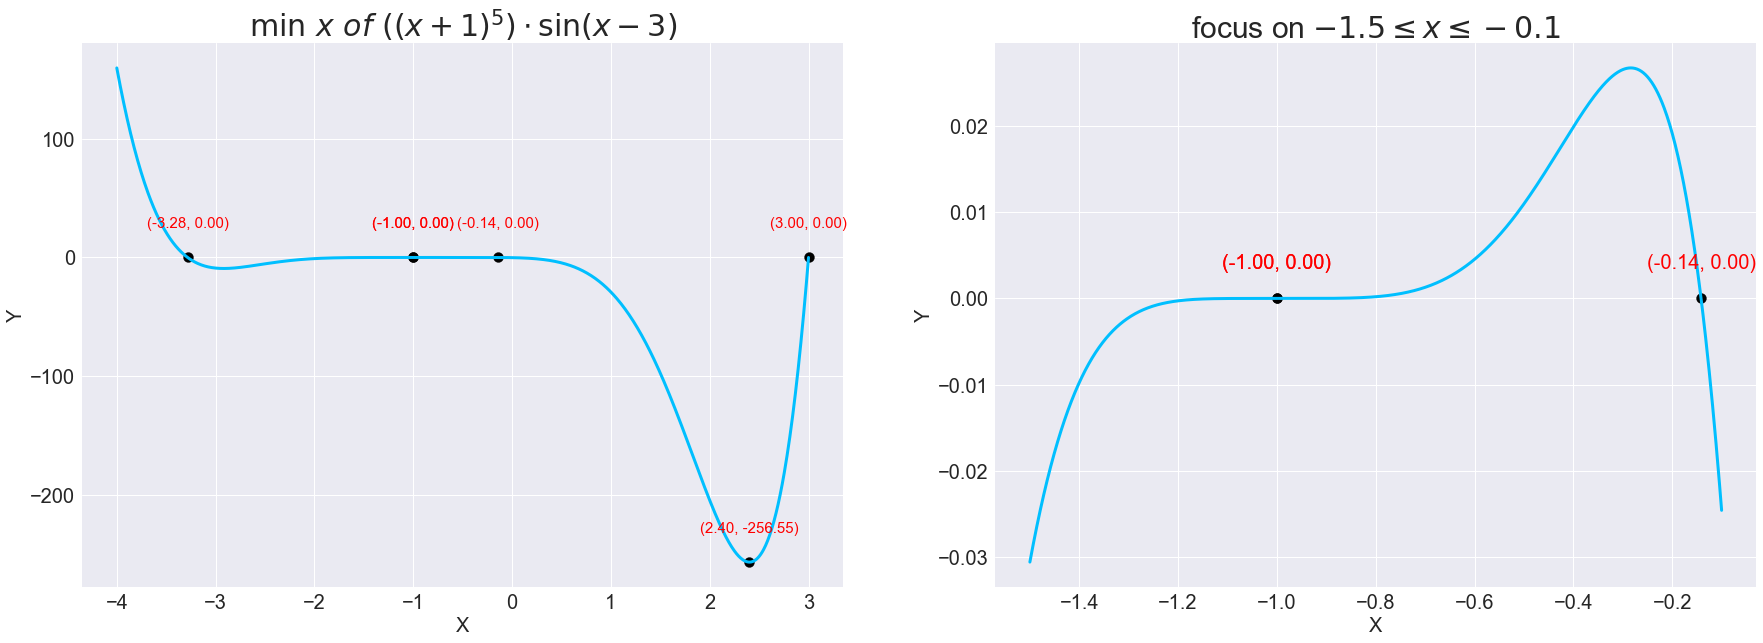

In [13]:
# main
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import warnings

# def x range
x_range = (-4, 3)
x_range1 = (-1.5, -0.1)

# find min value
x_min_val, y_min_val = find_min_val(x_range, f2)
rootval, y_root_vals = find_roots(f2, x_range)
x_points = rootval
x_points.append(x_min_val)
y_points = y_root_vals
y_points.append(y_min_val)

# fit x1 range
x_points1 = [x for x in x_points if isinstance(
    x, (int, float)) and x_range1[0] <= x <= x_range1[1]]
y_points1 = [y for x, y in zip(x_points, y_points) if isinstance(
    x, (int, float)) and x_range1[0] <= x <= x_range1[1]]

# plot
x = np.linspace(x_range[0], x_range[1], 1000)
x1 = np.linspace(x_range1[0], x_range1[1], 1000)

# adjust plot
title = r"$\min \ x \ of \ ((x + 1)^5) \cdot \sin(x-3)$"
title1 = r"focus on $-1.5 \leq x \leq -0.1$"

# plot
plt.style.use("seaborn")
fig, ax = plt.subplots(1, 2, figsize=(30, 10))
ax[0].grid(True)
ax[1].grid(True)

ax[0].plot(x, f2(x), color="deepskyblue", linewidth=3)
ax[1].plot(x1, f2(x1), color="deepskyblue", linewidth=3)

ax[0].scatter(x_points, y_points, color='black',
              marker='o', s=100, label=r'$\lim_{{x \to 0}}$')
for i, (x, y) in enumerate(zip(x_points, y_points)):
    ax[0].annotate(f'({x:.2f}, {y:.2f})', (x, y), textcoords="offset points", xytext=(
        0, 30), ha='center', fontsize=15, color='red')

ax[1].scatter(x_points1, y_points1, color='black',
              marker='o', s=100, label=r'$\lim_{{x \to 0}}$')
for i, (x, y) in enumerate(zip(x_points1, y_points1)):
    ax[1].annotate(f'({x:.2f}, {y:.2f})', (x, y), textcoords="offset points", xytext=(
        0, 30), ha='center', fontsize=20, color='red')

# custom show
ax[0].tick_params(labelsize=20)
ax[0].set_xlabel('X', fontsize=20)
ax[0].set_ylabel('Y', fontsize=20)
ax[0].set_title(title, fontsize=30)

ax[1].tick_params(labelsize=20)
ax[1].set_xlabel('X', fontsize=20)
ax[1].set_ylabel('Y', fontsize=20)
ax[1].set_title(title1, fontsize=30)

plt.show()

## 找出最小值 & 根 討論
沒什麼特別的，都是已知的用法 <br>
但可以知道有辦法避免局部最小值(在x = -3 跟 -4 之間) <br>

# 計算 $L(x) = 10$  的解 $x$, 其中 $L(x) = \int^{x}_{a} \sqrt{1 + (f^{\prime}(t))^2} dt,\ \text{for} \ f(t) = \cfrac{t^2}{2} \ \text{and} \ a = 0$

In [14]:
# def f(t) & f'(t)
def f(t):
    return t**2 / 2

def dt(t):
    return t

In [15]:
# def f(x)--before intergral to L(x)
import numpy as np
from scipy import integrate

def f3(x):
    with warnings.catch_warnings():
        # Ignoring warning
        warnings.filterwarnings("ignore", category=RuntimeWarning)
        result = np.sqrt(1 + x**2)
    return result

In [16]:
# def L(x)
# integrate.quad first is val, second is error
import numpy as np
from scipy import integrate, optimize
a = 0
def L(x):
    with warnings.catch_warnings():
        # Ignoring warning
        warnings.filterwarnings("ignore", category=RuntimeWarning)
        result = integrate.quad(f3, a, x)[0]
    return result

In [17]:
# find target area
def target_x(target_area):
    # fsolve : find the result that L(x) = area
    # x0 : initial guessing val (if func is complex, we have to change x0)
    result = optimize.fsolve(lambda x: L(x) - target_area, x0=0)
    x_sol = result[0]
    return x_sol

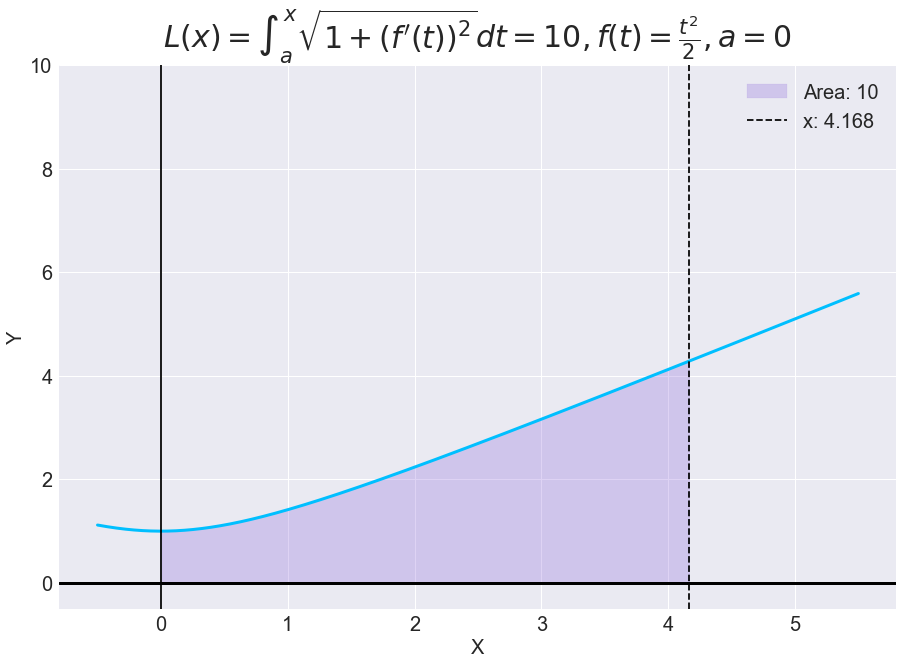

In [18]:
import numpy as np
from scipy import integrate
# basic def
a = 0
target_area = 10 # def target area(L(x) = 10)

# def x range
x_range = (-0.5, 5.5)

# plot
x = np.linspace(x_range[0], x_range[1], 1000)
bottom = a
top = target_x(target_area)

title3 = r"$L(x) = \int^{x}_{a} \sqrt{1 + (f^{\prime}(t))^2} dt = 10, f(t) = \frac{t^2}{2}, a = 0$"
draw(x, f3(x), y_range=(-0.5, 10), target_area=target_area, title=title3)
plt.axvline(x=top, color='black', linestyle='--', label=f'x: {top:.3f}')
plt.axvline(x=bottom, color='black')
plt.axhline(y=0, color='black', linewidth=3) # axhline at y=0
plt.legend(fontsize=20)
plt.show()

## 計算 $L(x)$ 討論
我想說簡化這個問題，從數學定義上來看，積分後的結果就是面積 <br>
因此最後是用標註面積的方式顯示出 $x$ 為多少的時候面積等於給定的 <br>

# 最大概似函數估計（MLE）（離散分配）：計算 $\displaystyle \max_{p} \ln \Pi_{i=1}^N f(x_i; p)$ 
其中 $f(x_i; p)$ 代表幾何分配的概似函數（參數 $p$：成功的機率， $x_i$：取得一次成功所需要的試驗次數），即 $f(x_i; p) = (1-p)^{x_i-1}p$。 現自幾何分配 $(p=0.2)$ 抽取樣本 $x_i, i=1,2,\cdots, N$，且令樣本數分別為 $N= 10, 20 ,30, 50, 100, 300, 500$，欲採最大概似估計法$(log MLE)$估計 $p$。
* 任取一組樣本，繪製目標函數 $\displaystyle \ln \Pi_{i=1}^N f(x_i; p)$，並標示出最大值的位置。

* 畫一張折線圖，呈現每組樣本數的 $p$ 估計值。為得到在每一組樣本數下較穩定的估計值，對每組樣本數皆執行 $10,000$ 次，最後取其平均數作為估計值，如下圖左。也因為執行了 $10,000$ 次，因此可以得出估計值的標準差，同樣也為每個樣本數的標準差畫一張折線圖，如下圖右。
請注意：本題雖然可以直接以紙筆推演出最後的封閉解（樣本平均值），不過為配合本章的主題，仍採計算對數概似函數最大值的方式進行。另外，也可以嘗試不取對數的做法，即 $\displaystyle \max_{p}  \Pi_{i=1}^N f(x_i; p)$

我們可以藉由數學邏輯得知 : $\displaystyle \max_{p} \ln \Pi_{i=1}^N f(x_i; p)$ = $\displaystyle \min_{p} (-\Sigma_{i=1}^N \ln f(x_i; p))$

## 使用單一種子執行一次，把所有 sample 的 MLE 製作成圖形

In [19]:
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import geom
from scipy.optimize import fminbound
import warnings
from IPython.display import HTML

# def pic
plt.style.use("seaborn")
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# basic def
np.random.seed(411078042)
N_values = [10, 20, 30, 50, 100, 300, 500, 1000, 1500]
range_p = np.linspace(0, 1, 250)
real_p = 0.2

# def f(x_i, p) = geo distribution
def geo_func(x_i, p):
    with warnings.catch_warnings():
        # ignore warning of caculating 0 and 1
        warnings.filterwarnings("ignore", category=RuntimeWarning)
        fun_result = (1 - p) ** (x_i - 1) * p
    return fun_result

# def result -- caculate sum of log-likelihood
def calculate_f(sample, p):
    with warnings.catch_warnings():
        # ignore warning of caculating 0 and 1
        warnings.filterwarnings("ignore", category=RuntimeWarning)
        every_xi = geo_func(sample, p)
        result = np.sum(np.log(every_xi))
    return -result

# def func of animation
def update(frame):
    ax.clear()

    # take samples = x_i
    sample = geom.rvs(real_p, size=N_values[frame])

    # save val we caculate
    finval = -np.array([calculate_f(sample, p) for p in range_p])

    # find max -- not use optimize for the reason that we already have all number
    max_val = np.max(finval)
    max_index = np.argmax(finval)
    max_p = range_p[max_index]

    # plot
    ax.plot(range_p, finval, label=f'N = {N_values[frame]}', linewidth=3, color="deepskyblue")
    ax.scatter(max_p, max_val, color='red', s=150)
    ax.annotate(f'Max: ({max_p:.2f}, {max_val:.2f})', xy=(max_p, max_val), xytext=(max_p-0.1, max_val - (N_values[frame])), fontsize=25)
    ax.set_ylim(-N_values[frame]*10, 0)
    ax.set_xlabel('p', fontsize=25)
    ax.set_ylabel(r'$\ln \Pi_{i=1}^N f(x_i; p)$', fontsize=25)
    ax.tick_params(axis='both', labelsize=25)
    ax.legend(fontsize=25)
    
    
# # animation
animation = FuncAnimation(fig, update, frames=len(N_values), interval=1000, repeat=False)

# display
display(HTML(animation.to_jshtml()))

# save to gif
# set stop time of every pic
s = 1.5
# save
animation.save('Geometric_MLE.gif', writer='imagemagick', fps=1/s)

plt.close()

### MLE(離散) 做圖 討論
沒啥特別的，單純做出計算式子以及跑出圖形 <br>
取最大值的部分因為已經算出所有的點了所以可以直接用 max 找出來(偷吃步) <br>

## 測試所有 sample，並且各自執行10000次取平均

finished sample : 10
finished sample : 20
finished sample : 30
finished sample : 50
finished sample : 100
finished sample : 300
finished sample : 500
98.4784


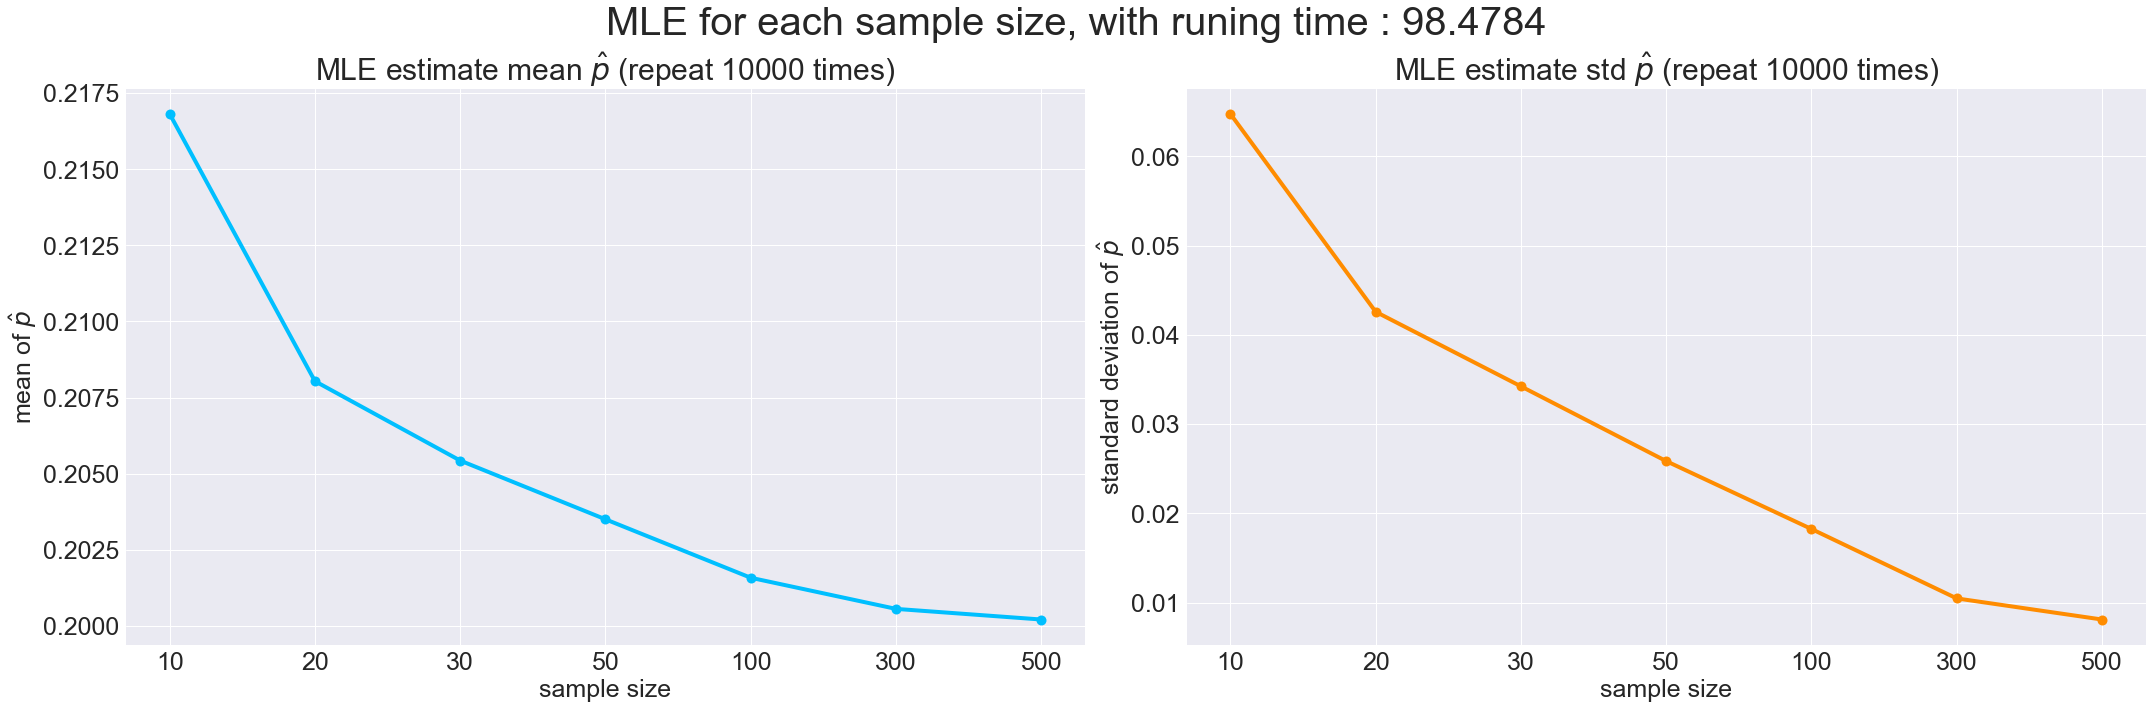

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import geom
import warnings
import time

# basic def
N_values = np.array([10, 20, 30, 50, 100, 300, 500])
repeat = 10000
range_p = np.linspace(0, 1, 250)
real_p = 0.2

# save mean / std val
mean_max_vals = []
std_max_vals = []

# def f(x_i, p) = geo distribution
def geo_func(x_i, p):
    # ignore warning of caculating 0 and 1
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=RuntimeWarning)
        fun_result = (1 - p) ** (x_i - 1) * p
    return fun_result

# def result -- caculate sum of log-likelihood
def calculate_f(samples, p_range):
    # ignore warning of caculating 0 and 1
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=RuntimeWarning)
        every_xi = geo_func(samples[:, :, np.newaxis], p_range)
        result = np.sum(np.log(every_xi), axis=1)
    return -result

# calculate time
start_time = time.time()

# run all N_values
for N in N_values:
    # generate samples
    samples = geom.rvs(real_p, size=(repeat, N))

    # Calculate the result of all samples
    finval = -calculate_f(samples, range_p)

    # find max p
    max_index = np.argmax(finval, axis=1)
    max_p = range_p[max_index]

    # find mean / std
    mean_max = np.mean(max_p)
    std_max = np.std(max_p)

    # save mean / std
    mean_max_vals.append(mean_max)
    std_max_vals.append(std_max)

    # record what we finished
    print(f"finished sample : {N}")

end_time = time.time()
using_time = round(end_time - start_time, 4)
print(using_time)


# def pic
fig, ax = plt.subplots(1, 2, figsize=(30, 10))
plt.style.use("seaborn")
## adjust x-axis
str_N = list(map(str, N_values))

# Plot the first subplot (average max values)
ax[0].plot(str_N, mean_max_vals, marker='o',
           linewidth=4, color="deepskyblue", markersize=10)
ax[0].set_title(
    fr'MLE estimate mean $\hat{{p}}$ (repeat {repeat} times)', fontsize=30)
ax[0].set_xlabel('sample size', fontsize=25)
ax[0].set_ylabel(r'mean of $\hat{p}$', fontsize=25)
ax[0].tick_params(labelsize=25)

# Plot the second subplot (standard deviation)
ax[1].plot(str_N, std_max_vals, marker='o',
           linewidth=4, color='darkorange', markersize=10)
ax[1].set_title(
    fr'MLE estimate std $\hat{{p}}$ (repeat {repeat} times)', fontsize=30)
ax[1].set_xlabel('sample size', fontsize=25)
ax[1].set_ylabel(r'standard deviation of $\hat{p}$', fontsize=25)
ax[1].tick_params(labelsize=25)

# Adjust & show
fig.suptitle(
    fr'MLE for each sample size, with runing time : {using_time}', fontsize=40)
plt.tight_layout()
plt.show()

### MLE(離散) 多次平均 討論
我們可以從圖上看到在樣本數增加之後平均的 $\hat{p}$ 值會趨近於實際值 <br>
而且當樣本數增加之後，標準差也會相對地降低許多 <br>

---

在測試時，有發現到當矩陣空間超過 (10000, 300, 1000) 的時候會出現記憶體不足 <br>
出現錯誤的原因是沒有足夠的空間記錄 <br>
因此我的 'linspace' 從設置 $1000$ 個點下降到改成設置 $250$ 個點(畢竟這是蠻平滑的函數所以不太影響) <br>
但我認為我的程式可能還有地方可以進行優化使這個錯誤不會發生

# 最大概似函數估計（MLE）（連續分配 ） : 計算 $\displaystyle \max_{\lambda} \ln \Pi_{i=1}^N f(x_i; \lambda)$

其中 $f(x_i; \lambda)$ 代表指數分配（參數 $\lambda$）的概似函數，即 $f(x_i; \lambda) = \lambda e^{-\lambda x_i}$。 令樣本數 $N= 10, 20 ,30, 50, 100, 300, 500$， 分別生成樣本 $x_i$（令真實 $\lambda = 2$，或自己設定），並採最大概似估計法(log MLE)估計 $\lambda$。

* 任取一組樣本，繪製目標函數 $\displaystyle \ln \Pi_{i=1}^N f(x_i; \lambda)$，並標示出最大值的位置。

* 畫一張折線圖，呈現每個樣本數的 $\lambda$ 估計值。為得到在每一個樣本數下較穩定的估計值，對每個樣本數皆執行 $10,000$ 次，最後取其平均數作為估計值，如下圖左。也因為執行了 $10,000$ 次，因此可以得出估計值的標準差，同樣也為每個樣本數的標準差畫一張折線圖，如下圖右。
請注意：本題雖然可以直接以紙筆推演出最後的封閉解（樣本平均值），不過為配合本章的主題，仍採計算對數概似函數最大值的方式進行。另外，也可以嘗試不取對數的做法，即 $\displaystyle \max_{\lambda}  \Pi_{i=1}^N f(x_i; \lambda)$



## 使用單一種子執行一次，把所有 sample 的 MLE 製作成圖形

In [17]:
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import expon
from scipy.optimize import fminbound
import warnings
from IPython.display import HTML

# def pic
plt.style.use("seaborn")
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# basic def
np.random.seed(411078042)
N_values = [10, 20, 30, 50, 100, 300, 500, 1000, 1500]
range_mu = np.linspace(0, 5, 250)
real_mu = 2

# def f(x_i, mu) = exp distribution
def expon_func(x_i, mu):
    # ignore warning of caculating 0 and 1
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=RuntimeWarning)
        fun_result = mu * np.exp(-mu * x_i)
    return fun_result

# def result -- calculate sum of log-likelihood
def calculate_f(sample, mu):
    # ignore warning of caculating 0 and 1
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=RuntimeWarning)
        every_xi = expon_func(sample, mu)
        result = np.sum(np.log(every_xi))
    return -result

# def func of animation
def update(frame):
    ax.clear()

    # take samples = x_i
    sample = expon.rvs(scale=1/real_mu, size=N_values[frame])

    # save val we calculate
    finval = -np.array([calculate_f(sample, mu) for mu in range_mu])

    # find max -- not use optimize for the reason that we already have all numbers
    max_val = np.max(finval)
    max_index = np.argmax(finval)
    max_mu = range_mu[max_index]

    # plot
    ax.plot(range_mu, finval, label=f'N = {N_values[frame]}', linewidth=3, color="deepskyblue")
    ax.scatter(max_mu, max_val, color='red', s=150)
    ax.annotate(f'Max: ({max_mu:.2f}, {max_val:.2f})', xy=(max_mu, max_val), xytext=(max_mu-0.1, max_val - (N_values[frame])), fontsize=25)
    ax.set_ylim(-N_values[frame]*7.5, N_values[frame]+1)
    ax.set_xlabel(r'\mu', fontsize=25)
    ax.set_ylabel(r'$\ln \Pi_{i=1}^N f(x_i; \lambda)$', fontsize=25)
    ax.tick_params(axis='both', labelsize=25)
    ax.legend(fontsize=25)

# animation
animation = FuncAnimation(fig, update, frames=len(N_values), interval=1000, repeat=False)

# display
display(HTML(animation.to_jshtml()))

# save to gif
# set stop time of every pic
s = 1.5
# save
animation.save('Exponential_MLE.gif', writer='imagemagick', fps=1/s)

plt.close()


### MLE(連續) 做圖 討論
沒啥特別的，單純做出計算式子以及跑出圖形 <br>
取最大值的部分因為已經算出所有的點了所以可以直接用 max 找出來(偷吃步) <br>

## 測試所有 sample，並且各自執行10000次取平均

finished sample : 10
finished sample : 20
finished sample : 30
finished sample : 50
finished sample : 100
finished sample : 300
finished sample : 500
256.9736


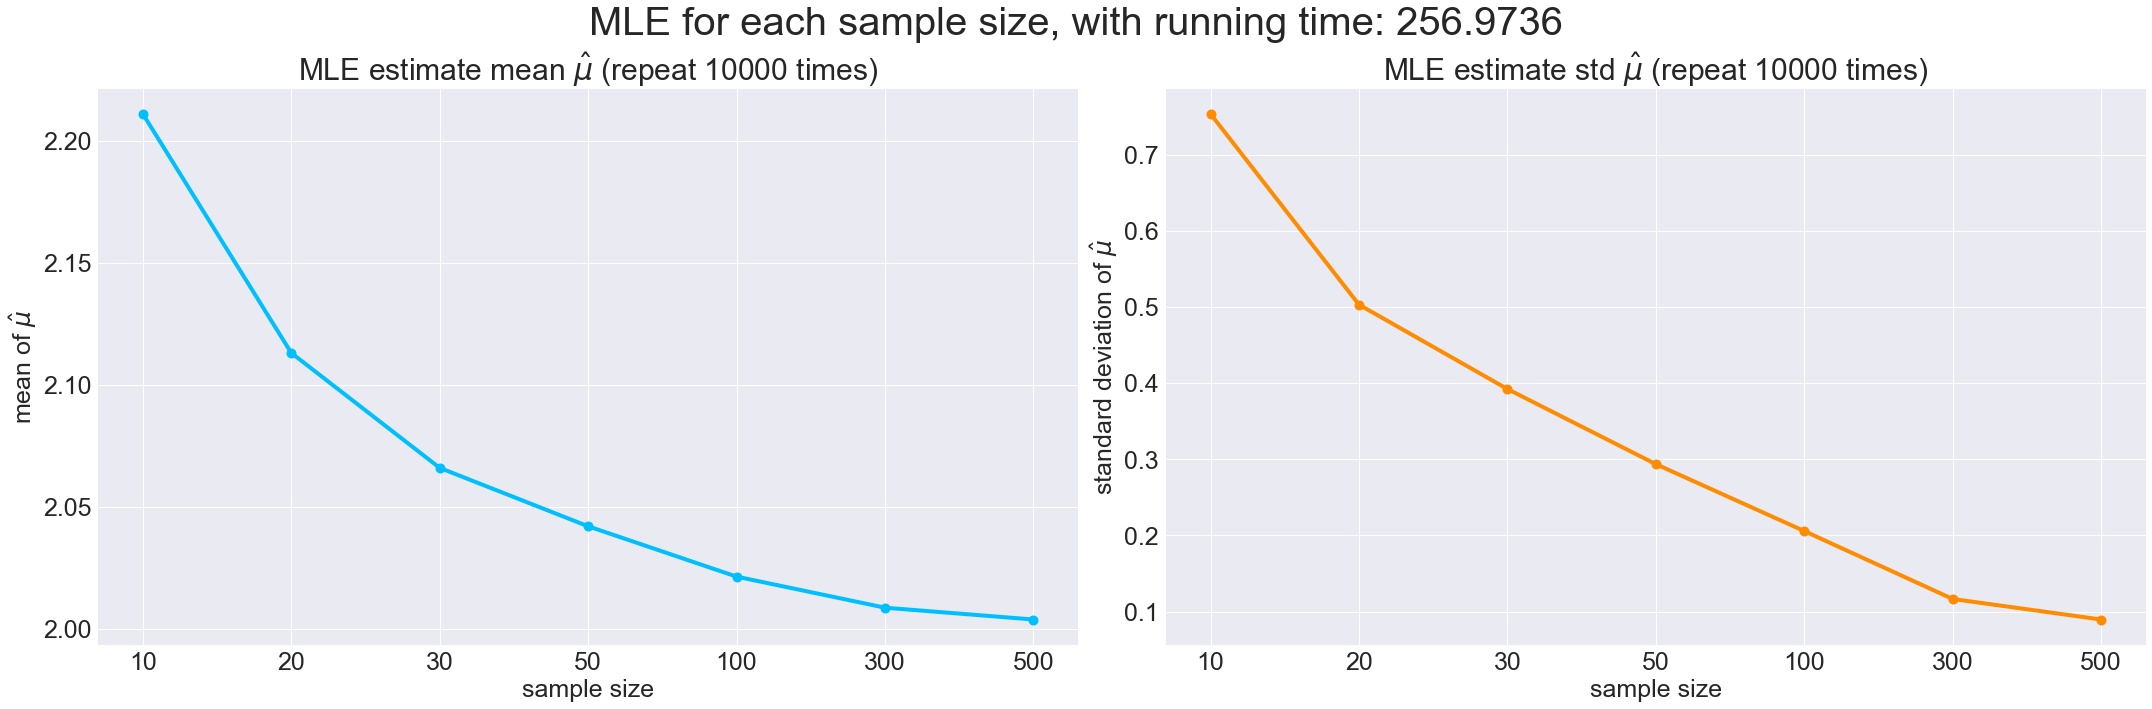

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
import warnings
import time

# basic def
N_values = np.array([10, 20, 30, 50, 100, 300, 500])
repeat = 10000
range_mu = np.linspace(0, 5, 250)
real_mu = 2

# save mean / std val
mean_max_vals = []
std_max_vals = []

# def f(x_i, mu) = exponential distribution
def expon_func(x_i, mu):
    # ignore warning of caculating 0 and 1
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=RuntimeWarning)
        fun_result = mu * np.exp(-mu * x_i)
    return fun_result

# def result -- calculate sum of log-likelihood
def calculate_f(samples, mu_range):
    # ignore warning of caculating 0 and 1
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=RuntimeWarning)
        every_xi = expon_func(samples[:, :, np.newaxis], mu_range)
        result = np.sum(np.log(every_xi), axis=1)
    return -result

# calculate time
start_time = time.time()

# run all N_values
for N in N_values:
    # generate samples
    samples = expon.rvs(scale=1/real_mu, size=(repeat, N))

    # Calculate the result of all samples
    finval = -calculate_f(samples, range_mu)

    # find max mu
    max_index = np.argmax(finval, axis=1)
    max_mu = range_mu[max_index]

    # find mean / std
    mean_max = np.mean(max_mu)
    std_max = np.std(max_mu)

    # save mean / std
    mean_max_vals.append(mean_max)
    std_max_vals.append(std_max)

    # record what we finished
    print(f"finished sample : {N}")

end_time = time.time()
using_time = round(end_time - start_time, 4)
print(using_time)

# def pic
fig, ax = plt.subplots(1, 2, figsize=(30, 10))
plt.style.use("seaborn")
## adjust x-axis
str_N = list(map(str, N_values))

# Plot the first subplot (average max values)
ax[0].plot(str_N, mean_max_vals, marker='o',
           linewidth=4, color="deepskyblue", markersize=10)
ax[0].set_title(
    fr'MLE estimate mean $\hat{{\mu}}$ (repeat {repeat} times)', fontsize=30)
ax[0].set_xlabel('sample size', fontsize=25)
ax[0].set_ylabel(r'mean of $\hat{\mu}$', fontsize=25)
ax[0].tick_params(labelsize=25)

# Plot the second subplot (standard deviation)
ax[1].plot(str_N, std_max_vals, marker='o',
           linewidth=4, color='darkorange', markersize=10)
ax[1].set_title(
    fr'MLE estimate std $\hat{{\mu}}$ (repeat {repeat} times)', fontsize=30)
ax[1].set_xlabel('sample size', fontsize=25)
ax[1].set_ylabel(r'standard deviation of $\hat{\mu}$', fontsize=25)
ax[1].tick_params(labelsize=25)

# Adjust & show
fig.suptitle(
    fr'MLE for each sample size, with running time: {using_time}', fontsize=40)
plt.tight_layout()
plt.show()


### MLE(連續) 多次平均 討論
我們可以從圖上看到在樣本數增加之後平均的 $\hat{\mu}$ 值會趨近於實際值 <br>
而且當樣本數增加之後，標準差也會相對地降低許多 <br>

---

在測試時，有發現到當矩陣空間超過 (10000, 300, 1000) 的時候會出現記憶體不足 <br>
出現錯誤的原因是沒有足夠的空間記錄 <br>
因此我的 'linspace' 從設置 $1000$ 個點下降到改成設置 $250$ 個點(畢竟這是蠻平滑的函數所以不太影響) <br>
但我認為我的程式可能還有地方可以進行優化使這個錯誤不會發生